<a href="https://colab.research.google.com/github/yassersakr88/Airbnb-New-User-Bookings/blob/main/EDA%20and%20try%20ML%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for Airbnb New User Bookings datasets

## Importing relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)

## loading datasets

In [ ]:
age_gender_bkts = pd.read_csv('age_gender_bkts.csv')
countries = pd.read_csv('countries.csv')
#sessions = pd.read_csv('sessions.csv')
train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')

## Data Wrangling

### 1. Age-Gender Dataset

In [ ]:
age_gender_df = age_gender_bkts.copy()
age_gender_df.head()

age_bucket country_destination gender  population_in_thousands    year
0       100+                  AU   male                      1.0  2015.0
1      95-99                  AU   male                      9.0  2015.0
2      90-94                  AU   male                     47.0  2015.0
3      85-89                  AU   male                    118.0  2015.0
4      80-84                  AU   male                    199.0  2015.0

In [ ]:
age_gender_df['country_destination'].unique()

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US'],
      dtype=object)

In [ ]:
us_age_gender_df = age_gender_df[age_gender_df['country_destination'] == 'US']#.reset_index().drop('index', axis=1)
us_age_gender_df.head()

age_bucket country_destination  gender  population_in_thousands    year
378      90-94                  US  female                   1193.0  2015.0
379      75-79                  US    male                   3641.0  2015.0
380      70-74                  US    male                   5278.0  2015.0
381      65-69                  US    male                   7561.0  2015.0
382      60-64                  US    male                   9217.0  2015.0

### 2. Countries Dataset

In [ ]:
countries.head()

country_destination  lat_destination  lng_destination  distance_km  \
0                  AU       -26.853388       133.275160   15297.7440   
1                  CA        62.393303       -96.818146    2828.1333   
2                  DE        51.165707        10.452764    7879.5680   
3                  ES        39.896027        -2.487694    7730.7240   
4                  FR        46.232193         2.209667    7682.9450   

   destination_km2 destination_language   language_levenshtein_distance  
0        7741220.0                   eng                           0.00  
1        9984670.0                   eng                           0.00  
2         357022.0                   deu                          72.61  
3         505370.0                   spa                          92.25  
4         643801.0                   fra                          92.06

### 3. Sessions Dataset

In [ ]:
#sessions.head()

### 4. Train Users Dataset

In [ ]:
train_users_df = train_users.copy()

In [ ]:
train_users_df.head()

id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NDF  
1        Chrome                 NDF  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US

In [ ]:
train_users_df.shape

(213451, 16)

#### Exploring the dataset

#### Dataset Pandas Profiling

In [ ]:
!pip install ydata_profiling
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(train_users_df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Checking for missing values

In [ ]:
train_users_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

#### Exploring variables

In [ ]:
train_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

**1. Date-time variables**

In [ ]:
train_users_df.select_dtypes(exclude='object').columns

Index(['timestamp_first_active', 'age', 'signup_flow'], dtype='object')

**date_account_created, date_first_booking and timestamp_first_active**

Convert `date_account_created`, `date_first_booking` and `timestamp_first_active` from `object` to `datetime` format

In [ ]:
train_users_df['date_account_created'] = pd.to_datetime(train_users_df['date_account_created'], format='%Y-%m-%d')
train_users_df['date_first_booking'] = pd.to_datetime(train_users_df['date_first_booking'], format='%Y-%m-%d')
train_users_df['timestamp_first_active'] = pd.to_datetime(train_users_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [ ]:
train_users_df.select_dtypes(exclude='object').columns

Index(['date_account_created', 'timestamp_first_active', 'date_first_booking',
       'age', 'signup_flow'],
      dtype='object')

**Extract `day`, `month` from `date_first_booking`**

In [ ]:
train_users_df['day_first_booking'] = train_users_df['date_first_booking'].dt.day_name()
train_users_df['day_first_booking'].unique()

array([nan, 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday',
       'Friday', 'Sunday'], dtype=object)

<Axes: xlabel='day_first_booking', ylabel='count'>

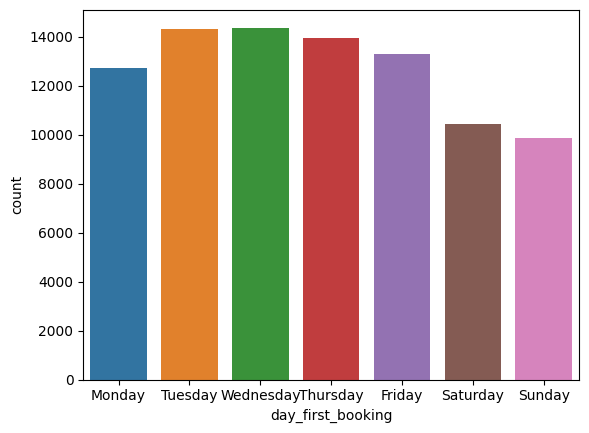

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x = train_users_df['day_first_booking'], order = day_order)

In [ ]:
train_users_df['month_first_booking'] = train_users_df['date_first_booking'].dt.month_name()
train_users_df['month_first_booking'].unique()

array([nan, 'August', 'September', 'February', 'January', 'July',
       'December', 'March', 'June', 'April', 'May', 'October', 'November'],
      dtype=object)

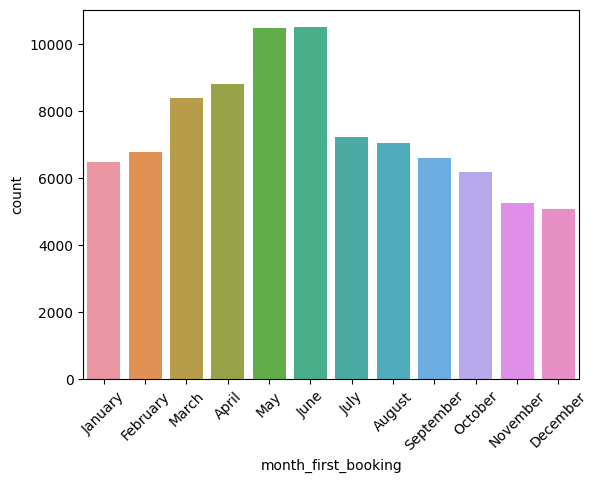

In [ ]:
month_order = ['January', 'February',  'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(x = train_users_df['month_first_booking'], order = month_order)
plt.xticks(rotation=45);

**Extract `hour` from `timestamp_first_active` to check when airbnb member are active around day time**

In [ ]:
train_users_df['hour_first_active'] = train_users_df['timestamp_first_active'].dt.hour
train_users_df['hour_first_active'].unique()

array([ 4, 17, 23,  6, 21,  1, 19,  0,  2,  5,  8, 20, 22, 15,  3, 13,  7,
       18,  9, 10, 16, 12, 11, 14])

<Axes: xlabel='hour_first_active', ylabel='count'>

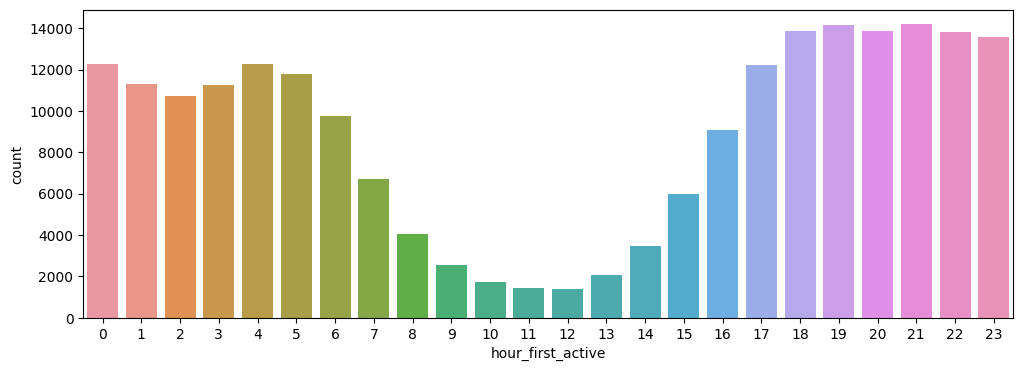

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x = train_users_df['hour_first_active'])

**2. Numerical variables**

**Age**

In [ ]:
train_users_df['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

As we see from descriptive statistics of the **`age`**, the max value is **`2014`** which I think is wrong input (birth date instaed of age) so I will try to corret these values to avoid outliers.

In [ ]:
for i in range(train_users_df.shape[0]):
    if train_users_df.loc[i, 'age'] > 150:
        train_users_df.loc[i, 'age'] = train_users_df.loc[i, 'date_account_created'].year - train_users_df.loc[i, 'age']

In [ ]:
train_users_df['age'][train_users_df['age'] > 150].unique()

array([], dtype=float64)

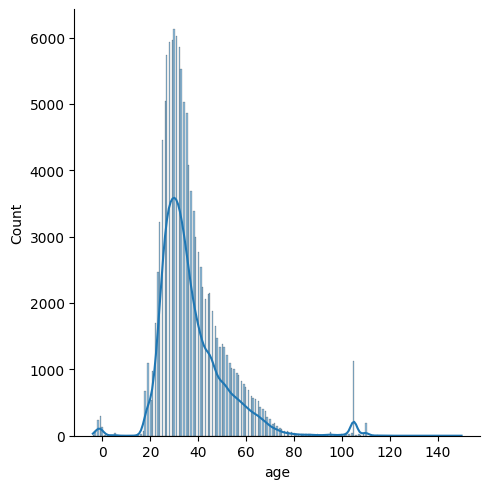

In [ ]:
sns.displot(train_users_df['age'], kde=True)

In [ ]:
train_users_df['age'].describe()

count    125461.000000
mean         37.190585
std          14.246715
min          -4.000000
25%          28.000000
50%          34.000000
75%          43.000000
max         150.000000
Name: age, dtype: float64

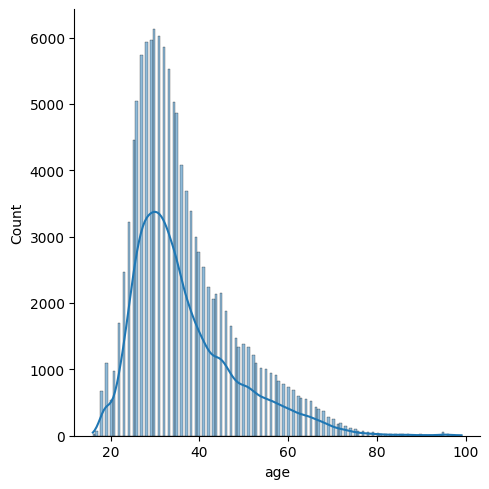

In [ ]:
train_users_df.loc[train_users_df['age'] >= 100, 'age'] = np.nan
train_users_df.loc[train_users_df['age'] <= 15, 'age'] = np.nan
sns.displot(train_users_df['age'], kde=True)

In [ ]:
train_users_df['age'].describe()

count    123054.000000
mean         36.556504
std          11.670817
min          16.000000
25%          28.000000
50%          34.000000
75%          42.000000
max          99.000000
Name: age, dtype: float64

In [ ]:
train_users_df['age'].isnull().sum()

90397

As we see, **`age`** column has **90804** missing values, about **42.5%** of the dataset but **`age`** is an important feature in prediction process so i will use **`miceforest`** to fill age column later.

**3. Categorical variables**

In [ ]:
cat_variables = train_users_df.select_dtypes(include='object').columns.values
cat_variables

array(['id', 'gender', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination',
       'day_first_booking', 'month_first_booking'], dtype=object)

**Gender**

<Axes: xlabel='gender', ylabel='count'>

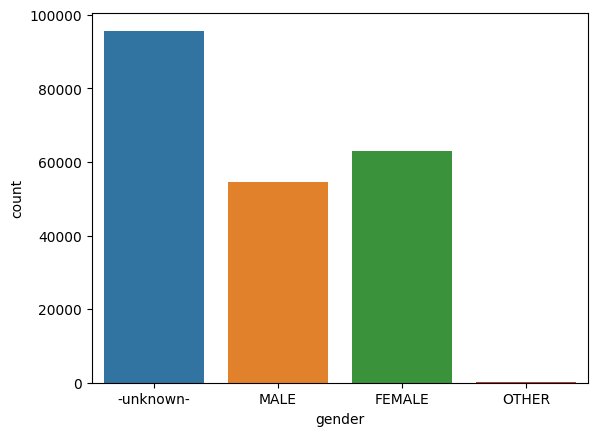

In [ ]:
sns.countplot(x=train_users_df['gender'])

In [ ]:
train_users_df['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [ ]:
train_users_df['gender'].replace({'-unknown-':np.nan, 'FEMALE':'female', 'MALE':'male', 'OTHER':np.nan}, inplace=True)

In [ ]:
train_users_df['gender'].isnull().sum()

95970

As we see, **`gender`** column has 95970 missing values, about **44.9%** of the dataset but **`gender`** is an important feature in prediction process so i will use **`miceforest`** to fill age column later.

<Axes: xlabel='gender', ylabel='count'>

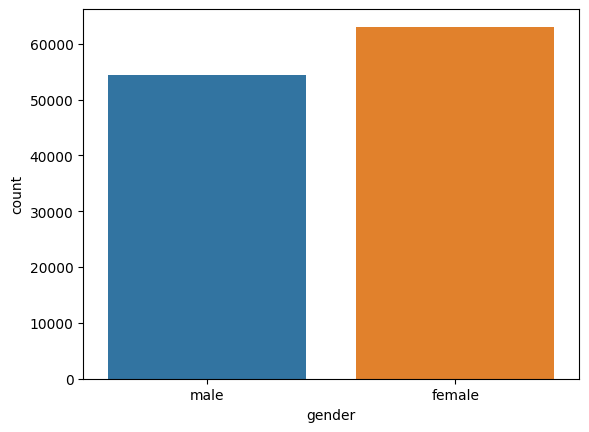

In [ ]:
sns.countplot(x=train_users_df['gender'])

**Country destination**

<Axes: xlabel='country_destination', ylabel='count'>

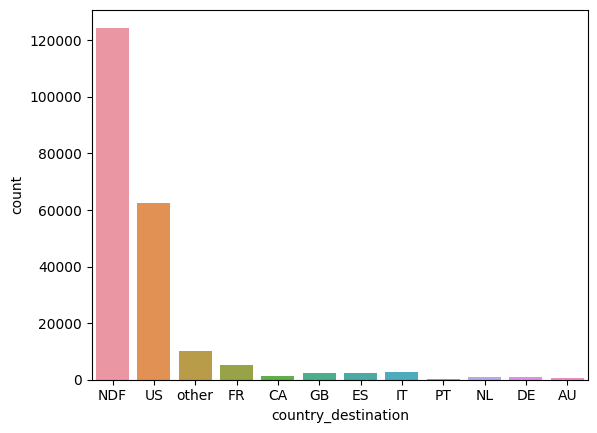

In [ ]:
sns.countplot(x=train_users_df['country_destination'])

In [ ]:
train_users_df['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [ ]:
train_users_df[train_users_df['date_first_booking'].isnull().any() and train_users_df['country_destination'] == 'NDF'].shape[0]

124543

**As we see, Rows with missing `date_first_booking` are rows with `country_destination` is equal `NDF`, so I will drop these rows**

In [ ]:
train_users_df.shape

(213451, 19)

In [ ]:
train_users_df.dropna(subset='date_first_booking', axis=0, inplace=True)

In [ ]:
train_users_df.shape

(88908, 19)

#### Data Imputation using `miceforest`

In [ ]:
!pip install miceforest
import miceforest as mf

convert `object` columns to `category` type

In [ ]:
train_users_df[train_users_df.select_dtypes(['object']).columns] = train_users_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [ ]:
train_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'day_first_booking',
       'month_first_booking', 'hour_first_active'],
      dtype='object')

In [ ]:
target_col = ['gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination']

remain_col = ['id', 'date_account_created', 'timestamp_first_active',
'date_first_booking']

In [ ]:
rare_cat = ['id' ,'signup_flow', 'language',
            'affiliate_provider', 'first_affiliate_tracked', 'first_device_type',
            'first_browser', 'country_destination']

In [ ]:
train_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88908 entries, 2 to 213445
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       88908 non-null  category      
 1   date_account_created     88908 non-null  datetime64[ns]
 2   timestamp_first_active   88908 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null  datetime64[ns]
 4   gender                   59714 non-null  category      
 5   age                      67201 non-null  float64       
 6   signup_method            88908 non-null  category      
 7   signup_flow              88908 non-null  int64         
 8   language                 88908 non-null  category      
 9   affiliate_channel        88908 non-null  category      
 10  affiliate_provider       88908 non-null  category      
 11  first_affiliate_tracked  87170 non-null  category      
 12  signup_app               88908 

In [ ]:
data = train_users_df[target_col]

In [ ]:
# Create kernel.
kernel = mf.ImputationKernel(
  data,
  save_all_iterations=True,
  random_state=1
)

# Printing the kernel will show you some high level information.
print(kernel)

# Run mice with our newly tuned parameters.
kernel.mice(2, n_estimators=50)

# Create completed dataset
completed_dataset = kernel.complete_data()

# Add imputed data to the original datasets
train_users_df[target_col] = completed_dataset

/usr/local/lib/python3.10/dist-packages/miceforest/ImputationKernel.py:371: UserWarning: [signup_method,language,affiliate_provider,first_affiliate_tracked,first_device_type,first_browser] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(



              Class: ImputationKernel
           Datasets: 1
         Iterations: 0
       Data Samples: 88908
       Data Columns: 12
  Imputed Variables: 3
save_all_iterations: True


In [ ]:
train_users_df.isnull().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
day_first_booking          0
month_first_booking        0
hour_first_active          0
dtype: int64

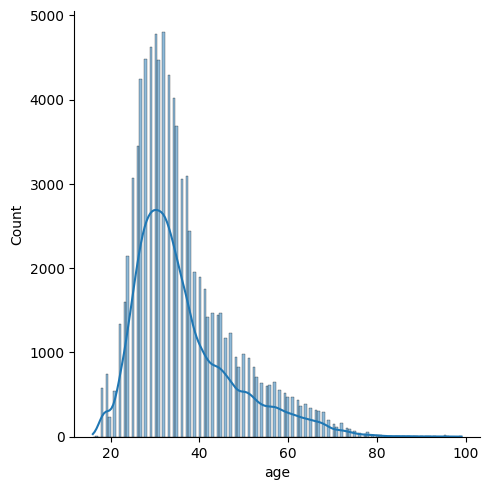

In [ ]:
sns.displot(train_users_df['age'], kde=True)

I will use z-score method to nullify `age` outliers.

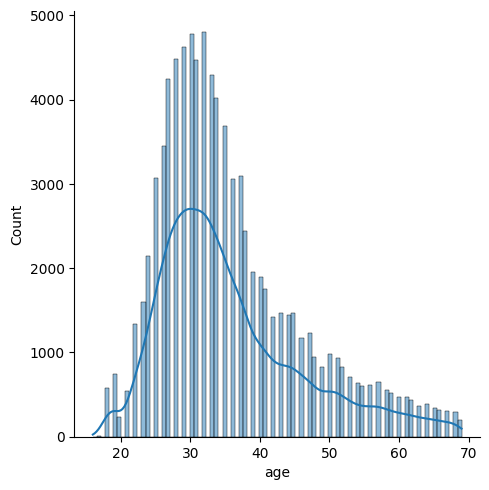

In [ ]:
from scipy import stats
train_users_df['z_scores'] = stats.zscore(train_users_df['age'])
train_users_df['abs_z_scores'] = train_users_df['z_scores'].abs()
threshold = 3
train_users_df.loc[train_users_df['abs_z_scores'] > threshold, 'age'] = np.nan
sns.displot(train_users_df['age'], kde=True)

In [ ]:
train_users_df.dropna(subset='age', axis=0, inplace=True)

In [ ]:
train_users_df.isnull().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
day_first_booking          0
month_first_booking        0
hour_first_active          0
z_scores                   0
abs_z_scores               0
dtype: int64

In [ ]:
train_users_df['age'].describe()

count    87871.000000
mean        35.735191
std         10.408492
min         16.000000
25%         28.000000
50%         33.000000
75%         41.000000
max         69.000000
Name: age, dtype: float64

#### Create cleaned train_users dataframe

In [ ]:
train_users_df[train_users_df.select_dtypes(['category']).columns] = train_users_df.select_dtypes(['category']).apply(lambda x: x.astype('object'))

In [ ]:
train_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87871 entries, 2 to 213445
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       87871 non-null  object        
 1   date_account_created     87871 non-null  datetime64[ns]
 2   timestamp_first_active   87871 non-null  datetime64[ns]
 3   date_first_booking       87871 non-null  datetime64[ns]
 4   gender                   87871 non-null  object        
 5   age                      87871 non-null  float64       
 6   signup_method            87871 non-null  object        
 7   signup_flow              87871 non-null  int64         
 8   language                 87871 non-null  object        
 9   affiliate_channel        87871 non-null  object        
 10  affiliate_provider       87871 non-null  object        
 11  first_affiliate_tracked  87871 non-null  object        
 12  signup_app               87871 

In [ ]:
train_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'day_first_booking',
       'month_first_booking', 'hour_first_active', 'z_scores', 'abs_z_scores'],
      dtype='object')

In [ ]:
train_users_cleaned = train_users_df.drop(axis=1,
                                          columns=['day_first_booking', 'month_first_booking', 'hour_first_active','z_scores', 'abs_z_scores']).copy()
train_users_cleaned.head()

id date_account_created timestamp_first_active date_first_booking  \
2  4ft3gnwmtx           2010-09-28    2009-06-09 23:12:47         2010-08-02   
3  bjjt8pjhuk           2011-12-05    2009-10-31 06:01:29         2012-09-08   
4  87mebub9p4           2010-09-14    2009-12-08 06:11:05         2010-02-18   
5  osr2jwljor           2010-01-01    2010-01-01 21:56:19         2010-01-02   
6  lsw9q7uk0j           2010-01-02    2010-01-02 01:25:58         2010-01-05   

   gender   age signup_method  signup_flow language affiliate_channel  \
2  female  56.0         basic            3       en            direct   
3  female  42.0      facebook            0       en            direct   
4    male  41.0         basic            0       en            direct   
5    male  54.0         basic            0       en             other   
6  female  46.0         basic            0       en             other   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   
5              other                     omg        Web       Mac Desktop   
6         craigslist               untracked        Web       Mac Desktop   

  first_browser country_destination  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US  
5        Chrome                  US  
6        Safari                  US

In [ ]:
train_users_cleaned.shape

(87871, 16)

In [ ]:
train_users_cleaned.to_csv('train_users_cleaned.csv')

### 5. Test Users Dataset

In [ ]:
test_users_df = test_users.copy()

In [ ]:
test_users_df.head()

id date_account_created  timestamp_first_active  \
0  5uwns89zht           2014-07-01          20140701000006   
1  jtl0dijy2j           2014-07-01          20140701000051   
2  xx0ulgorjt           2014-07-01          20140701000148   
3  6c6puo6ix0           2014-07-01          20140701000215   
4  czqhjk3yfe           2014-07-01          20140701000305   

   date_first_booking     gender   age signup_method  signup_flow language  \
0                 NaN     FEMALE  35.0      facebook            0       en   
1                 NaN  -unknown-   NaN         basic            0       en   
2                 NaN  -unknown-   NaN         basic            0       en   
3                 NaN  -unknown-   NaN         basic            0       en   
4                 NaN  -unknown-   NaN         basic            0       en   

  affiliate_channel affiliate_provider first_affiliate_tracked signup_app  \
0            direct             direct               untracked      Moweb   
1            direct             direct               untracked      Moweb   
2            direct             direct                  linked        Web   
3            direct             direct                  linked        Web   
4            direct             direct               untracked        Web   

  first_device_type  first_browser  
0            iPhone  Mobile Safari  
1            iPhone  Mobile Safari  
2   Windows Desktop         Chrome  
3   Windows Desktop             IE  
4       Mac Desktop         Safari

In [ ]:
test_users_df.shape

(62096, 15)

In [ ]:
profile = ProfileReport(test_users_df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Check for duplicates

In [ ]:
test_users_df.duplicated().sum()

0

In [ ]:
test_users_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

#### Exploring variables

In [ ]:
test_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')

#### date_account_created, date_first_booking and timestamp_first_active
Convert `date_account_created`, `date_first_booking` and `timestamp_first_active` from `object` to `datetime` format

In [ ]:
test_users_df['date_account_created'] = pd.to_datetime(test_users_df['date_account_created'], format='%Y-%m-%d')
test_users_df['date_first_booking'] = pd.to_datetime(test_users_df['date_first_booking'], format='%Y-%m-%d')
test_users_df['timestamp_first_active'] = pd.to_datetime(test_users_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

**1. Numerical variables**

**Age**

In [ ]:
test_users_df['age'].describe()

count    33220.000000
mean        37.616677
std         74.440647
min          1.000000
25%         26.000000
50%         31.000000
75%         40.000000
max       2002.000000
Name: age, dtype: float64

In [ ]:
for i in range(test_users_df.shape[0]):
    if test_users_df.loc[i, 'age'] > 150:
        test_users_df.loc[i, 'age'] = test_users_df.loc[i, 'date_account_created'].year - test_users_df.loc[i, 'age']

In [ ]:
test_users_df['age'][test_users_df['age'] > 150].unique()

array([], dtype=float64)

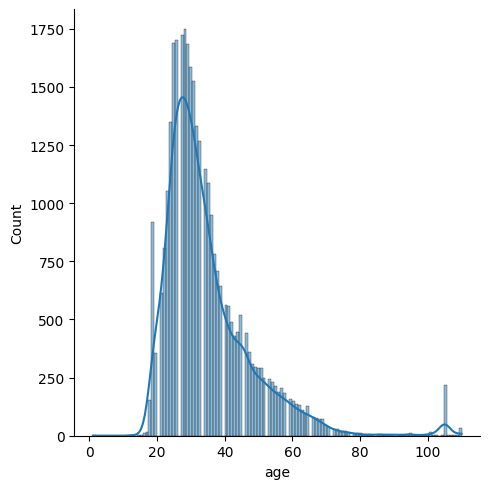

In [ ]:
sns.displot(test_users_df['age'], kde=True)

In [ ]:
test_users_df['age'].describe()

count    33220.000000
mean        34.852980
std         13.245664
min          1.000000
25%         26.000000
50%         31.000000
75%         40.000000
max        110.000000
Name: age, dtype: float64

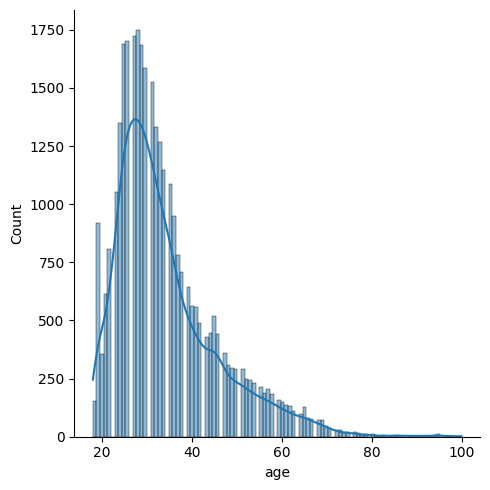

In [ ]:
test_users_df.loc[test_users_df['age'] > 100, 'age'] = np.nan
test_users_df.loc[test_users_df['age'] < 18, 'age'] = np.nan
sns.displot(test_users_df['age'], kde=True)
plt.tight_layout()

In [ ]:
test_users_df['age'].describe()

count    32887.000000
mean        34.240916
std         11.473089
min         18.000000
25%         26.000000
50%         31.000000
75%         39.000000
max        100.000000
Name: age, dtype: float64

In [ ]:
test_users_df['age'].isnull().sum()

29209

As we see, **`age`** column has missing values, so i will use **`miceforest`** to fill age column later.

**3. Categorical variables**

In [ ]:
cat_variables = test_users_df.select_dtypes(include='object').columns.values
cat_variables

array(['id', 'gender', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'], dtype=object)

**Gender**

<Axes: xlabel='gender', ylabel='count'>

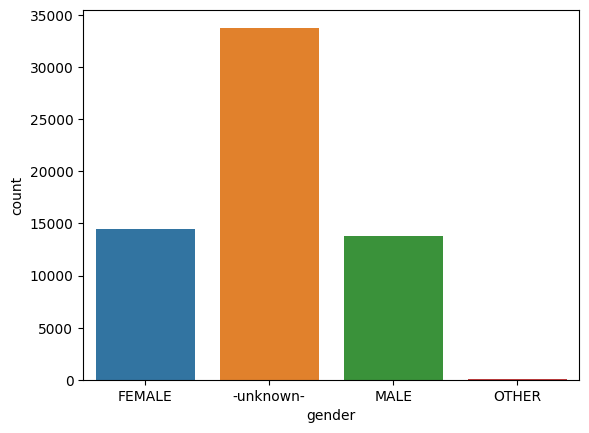

In [ ]:
sns.countplot(x=test_users_df['gender'])

In [ ]:
test_users_df['gender'].value_counts()

-unknown-    33792
FEMALE       14483
MALE         13769
OTHER           52
Name: gender, dtype: int64

In [ ]:
test_users_df['gender'].replace({'-unknown-':np.nan, 'FEMALE':'female', 'MALE':'male', 'OTHER':np.nan}, inplace=True)

In [ ]:
test_users_df['gender'].isnull().sum()

33844

As we see, **`gender`** column has 95970 missing values, about **44.9%** of the dataset but **`gender`** is an important feature in prediction process so i will use **`miceforest`** to fill age column later.

#### Data Imputation using `miceforest` algorithm

**convert `object` columns to `category` type**

In [ ]:
test_users_df[test_users_df.select_dtypes(['object']).columns] = test_users_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [ ]:
test_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')

In [ ]:
test_target_col = ['gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser']

test_remain_col = ['id', 'date_account_created', 'timestamp_first_active',
'date_first_booking']

In [ ]:
test_rare_cat = ['id' ,'signup_flow', 'language', 'affiliate_provider', 'first_affiliate_tracked',
            'first_device_type', 'first_browser', 'country_destination']

In [ ]:
test_data = test_users_df[test_target_col]

In [ ]:
# Create kernel.
test_kernel = mf.ImputationKernel(
  test_data,
  save_all_iterations=True,
  random_state=1
)

# Printing the kernel will show you some high level information.
print(test_kernel)

# Run mice with our newly tuned parameters.
test_kernel.mice(2, n_estimators=50)

# Create completed dataset
completed_dataset = test_kernel.complete_data()

# Add imputed data to the original datasets
test_users_df[test_target_col] = completed_dataset

/usr/local/lib/python3.10/dist-packages/miceforest/ImputationKernel.py:371: UserWarning: [signup_method,language,affiliate_provider,first_affiliate_tracked,first_device_type,first_browser] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(



              Class: ImputationKernel
           Datasets: 1
         Iterations: 0
       Data Samples: 62096
       Data Columns: 11
  Imputed Variables: 3
save_all_iterations: True


In [ ]:
test_users_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                            0
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked        0
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

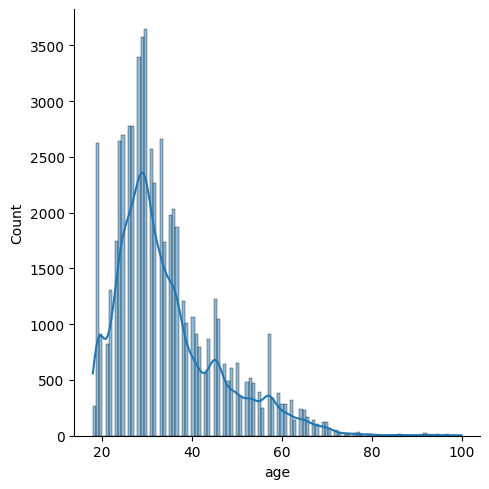

In [ ]:
sns.displot(test_users_df['age'], kde=True)

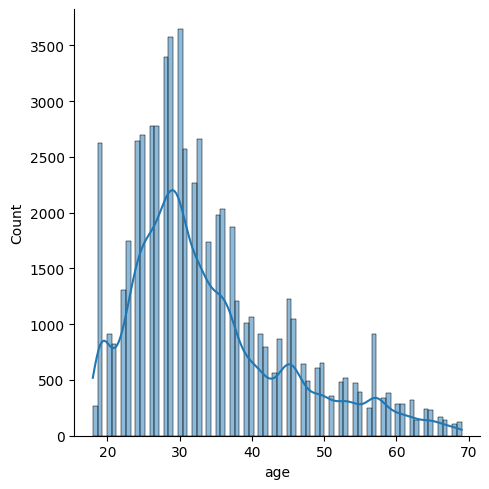

In [ ]:
from scipy import stats
test_users_df['z_scores'] = stats.zscore(test_users_df['age'])
test_users_df['abs_z_scores'] = test_users_df['z_scores'].abs()
threshold = 3
test_users_df.loc[test_users_df['abs_z_scores'] > threshold, 'age'] = np.nan
sns.displot(test_users_df['age'], kde=True)

In [ ]:
test_users_df.dropna(subset='age', axis=0, inplace=True)

In [ ]:
test_users_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         61522
gender                         0
age                            0
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked        0
signup_app                     0
first_device_type              0
first_browser                  0
z_scores                       0
abs_z_scores                   0
dtype: int64

In [ ]:
test_users_df['age'].describe()

count    61522.000000
mean        33.996814
std         10.870647
min         18.000000
25%         26.000000
50%         31.000000
75%         39.000000
max         69.000000
Name: age, dtype: float64

#### Create cleaned train_users dataframe

In [ ]:
test_users_df[test_users_df.select_dtypes(['category']).columns] = test_users_df.select_dtypes(['category']).apply(lambda x: x.astype('object'))

In [ ]:
test_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61522 entries, 0 to 62095
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       61522 non-null  object        
 1   date_account_created     61522 non-null  datetime64[ns]
 2   timestamp_first_active   61522 non-null  datetime64[ns]
 3   date_first_booking       0 non-null      datetime64[ns]
 4   gender                   61522 non-null  object        
 5   age                      61522 non-null  float64       
 6   signup_method            61522 non-null  object        
 7   signup_flow              61522 non-null  int64         
 8   language                 61522 non-null  object        
 9   affiliate_channel        61522 non-null  object        
 10  affiliate_provider       61522 non-null  object        
 11  first_affiliate_tracked  61522 non-null  object        
 12  signup_app               61522 n

In [ ]:
test_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'z_scores', 'abs_z_scores'],
      dtype='object')

In [ ]:
test_users_cleaned = test_users_df.drop(axis=1, columns=['z_scores', 'abs_z_scores']).copy()
test_users_cleaned.head()

id date_account_created timestamp_first_active date_first_booking  \
0  5uwns89zht           2014-07-01    2014-07-01 00:00:06                NaT   
1  jtl0dijy2j           2014-07-01    2014-07-01 00:00:51                NaT   
2  xx0ulgorjt           2014-07-01    2014-07-01 00:01:48                NaT   
3  6c6puo6ix0           2014-07-01    2014-07-01 00:02:15                NaT   
4  czqhjk3yfe           2014-07-01    2014-07-01 00:03:05                NaT   

   gender   age signup_method  signup_flow language affiliate_channel  \
0  female  35.0      facebook            0       en            direct   
1  female  25.0         basic            0       en            direct   
2  female  30.0         basic            0       en            direct   
3    male  48.0         basic            0       en            direct   
4    male  46.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked      Moweb            iPhone   
1             direct               untracked      Moweb            iPhone   
2             direct                  linked        Web   Windows Desktop   
3             direct                  linked        Web   Windows Desktop   
4             direct               untracked        Web       Mac Desktop   

   first_browser  
0  Mobile Safari  
1  Mobile Safari  
2         Chrome  
3             IE  
4         Safari

In [ ]:
test_users_cleaned.shape

(61522, 15)

In [ ]:
test_users_cleaned.to_csv('test_users_cleaned.csv')

##############################################################################################################################

## ML modelling

### Train dataset

In [ ]:
train_users_cleaned.head()

id date_account_created timestamp_first_active date_first_booking  \
2  4ft3gnwmtx           2010-09-28    2009-06-09 23:12:47         2010-08-02   
3  bjjt8pjhuk           2011-12-05    2009-10-31 06:01:29         2012-09-08   
4  87mebub9p4           2010-09-14    2009-12-08 06:11:05         2010-02-18   
5  osr2jwljor           2010-01-01    2010-01-01 21:56:19         2010-01-02   
6  lsw9q7uk0j           2010-01-02    2010-01-02 01:25:58         2010-01-05   

   gender   age signup_method  signup_flow language affiliate_channel  \
2  female  56.0         basic            3       en            direct   
3  female  42.0      facebook            0       en            direct   
4    male  41.0         basic            0       en            direct   
5    male  54.0         basic            0       en             other   
6  female  46.0         basic            0       en             other   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   
5              other                     omg        Web       Mac Desktop   
6         craigslist               untracked        Web       Mac Desktop   

  first_browser country_destination  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US  
5        Chrome                  US  
6        Safari                  US

In [ ]:
X_train = train_users_cleaned.drop(['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking'], axis=1).iloc[:, :-1]
y_train = train_users_cleaned.iloc[:, -1]

In [ ]:
X_train.head()

gender   age signup_method  signup_flow language affiliate_channel  \
2  female  56.0         basic            3       en            direct   
3  female  42.0      facebook            0       en            direct   
4    male  41.0         basic            0       en            direct   
5    male  54.0         basic            0       en             other   
6  female  46.0         basic            0       en             other   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   
5              other                     omg        Web       Mac Desktop   
6         craigslist               untracked        Web       Mac Desktop   

  first_browser  
2            IE  
3       Firefox  
4        Chrome  
5        Chrome  
6        Safari

In [ ]:
y_train.head()

2       US
3    other
4       US
5       US
6       US
Name: country_destination, dtype: object

### Test dataset

In [ ]:
test_users_cleaned.head()

id date_account_created timestamp_first_active date_first_booking  \
0  5uwns89zht           2014-07-01    2014-07-01 00:00:06                NaT   
1  jtl0dijy2j           2014-07-01    2014-07-01 00:00:51                NaT   
2  xx0ulgorjt           2014-07-01    2014-07-01 00:01:48                NaT   
3  6c6puo6ix0           2014-07-01    2014-07-01 00:02:15                NaT   
4  czqhjk3yfe           2014-07-01    2014-07-01 00:03:05                NaT   

   gender   age signup_method  signup_flow language affiliate_channel  \
0  female  35.0      facebook            0       en            direct   
1  female  25.0         basic            0       en            direct   
2  female  30.0         basic            0       en            direct   
3    male  48.0         basic            0       en            direct   
4    male  46.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked      Moweb            iPhone   
1             direct               untracked      Moweb            iPhone   
2             direct                  linked        Web   Windows Desktop   
3             direct                  linked        Web   Windows Desktop   
4             direct               untracked        Web       Mac Desktop   

   first_browser  
0  Mobile Safari  
1  Mobile Safari  
2         Chrome  
3             IE  
4         Safari

In [ ]:
X_test = test_users_cleaned.drop(['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking'], axis=1)

In [ ]:
X_test.head()

gender   age signup_method  signup_flow language affiliate_channel  \
0  female  35.0      facebook            0       en            direct   
1  female  25.0         basic            0       en            direct   
2  female  30.0         basic            0       en            direct   
3    male  48.0         basic            0       en            direct   
4    male  46.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked      Moweb            iPhone   
1             direct               untracked      Moweb            iPhone   
2             direct                  linked        Web   Windows Desktop   
3             direct                  linked        Web   Windows Desktop   
4             direct               untracked        Web       Mac Desktop   

   first_browser  
0  Mobile Safari  
1  Mobile Safari  
2         Chrome  
3             IE  
4         Safari

### Concatenating X_train and X_test to perform OneHotEncoding

In [ ]:
train_shape = X_train.shape[0]
train_shape

87871

In [ ]:
X = pd.concat([X_train, X_test], ignore_index=True)
X.head()

gender   age signup_method  signup_flow language affiliate_channel  \
0  female  56.0         basic            3       en            direct   
1  female  42.0      facebook            0       en            direct   
2    male  41.0         basic            0       en            direct   
3    male  54.0         basic            0       en             other   
4  female  46.0         basic            0       en             other   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web   Windows Desktop   
1             direct               untracked        Web       Mac Desktop   
2             direct               untracked        Web       Mac Desktop   
3              other                     omg        Web       Mac Desktop   
4         craigslist               untracked        Web       Mac Desktop   

  first_browser  
0            IE  
1       Firefox  
2        Chrome  
3        Chrome  
4        Safari

### One Hot Encoding

In [ ]:
cat_cols = X.select_dtypes(include='object').columns
cat_cols

Index(['gender', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), cat_cols)], remainder='passthrough')

In [ ]:
X = ct.fit_transform(X)
X

<149393x122 sparse matrix of type '<class 'numpy.float64'>'
	with 1533347 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(X.toarray()).head()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   \
0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
1  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
3  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   \
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   \
0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   90   91   92   93   94   95   96   97   98   99   100  101  102  103  104  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    120  121  
0  56.0  3.0  
1  42.0  0.0  
2  41.0  0.0  
3  54.0  0.0  
4  46.0  0.0

### Spliting X dataset to train set and test set

In [ ]:
X_train = X[:train_shape, :]
X_test = X[train_shape:, :]

In [ ]:
X_train.shape, X_test.shape

((87871, 122), (61522, 122))

### Spliting train dataset to train set and validation set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train[:, -2:] = sc.fit_transform(X_train[:, -2:])
X_val[:, -2:] = sc.fit_transform(X_val[:, -2:])
X_test[:, -2:] = sc.transform(X_test[:, -2:])

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

## 1. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_dt = dt_classifier.predict(X_val)
y_pred_dt = le.inverse_transform(y_pred_dt)
y_pred_dt

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

dt_accuracy_score = accuracy_score(y_val, y_pred_dt)
print('Accuracy Score = {:.2f}%'.format(dt_accuracy_score*100))

Accuracy Score = 63.32%


In [ ]:
yhat_dt = dt_classifier.predict(X_test)
yhat_dt = le.inverse_transform(yhat_dt)
yhat_dt

array(['US', 'US', 'US', ..., 'US', 'other', 'US'], dtype=object)

## 2. Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_rf = rf_classifier.predict(X_val)
y_pred_rf = le.inverse_transform(y_pred_rf)
y_pred_rf

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

rf_accuracy_score = accuracy_score(y_val, y_pred_rf)
print('Accuracy Score = {:.2f}%'.format(rf_accuracy_score*100))

Accuracy Score = 66.26%


In [ ]:
yhat_rf = rf_classifier.predict(X_test)
yhat_rf = le.inverse_transform(yhat_rf)
yhat_rf

array(['US', 'US', 'US', ..., 'US', 'other', 'US'], dtype=object)

## 3. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_classifier.predict(X_val)
y_pred_knn = le.inverse_transform(y_pred_knn)
y_pred_knn

array(['FR', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

knn_accuracy_score = accuracy_score(y_val, y_pred_knn)
print('Accuracy Score = {:.2f}%'.format(knn_accuracy_score*100))

Accuracy Score = 65.90%


In [ ]:
yhat_knn = knn_classifier.predict(X_test)
yhat_knn = le.inverse_transform(yhat_knn)
yhat_knn

array(['US', 'US', 'ES', ..., 'US', 'other', 'US'], dtype=object)

## 4. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train.toarray(), y_train)

MultinomialNB()

In [ ]:
y_pred_nb = nb_classifier.predict(X_val.toarray())
y_pred_nb = le.inverse_transform(y_pred_nb)
y_pred_nb

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

nb_accuracy_score = accuracy_score(y_val, y_pred_nb)
print('Accuracy Score = {:.2f}%'.format(nb_accuracy_score*100))

Accuracy Score = 70.26%


In [ ]:
yhat_nb = nb_classifier.predict(X_test.toarray())
yhat_nb = le.inverse_transform(yhat_nb)
yhat_nb

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

## 5. XGBoost model

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred_xgb = xgb_classifier.predict(X_val)
y_pred_xgb = le.inverse_transform(y_pred_xgb)
y_pred_xgb

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

xgb_accuracy_score = accuracy_score(y_val, y_pred_xgb)
print('Accuracy score = {:.2f} %'.format(xgb_accuracy_score*100))

Accuracy score = 70.27 %


In [ ]:
yhat_xgb = xgb_classifier.predict(X_test)
yhat_xgb = le.inverse_transform(yhat_xgb)
yhat_xgb

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

## 6. CatBoost model

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cb_classifier = CatBoostClassifier()
cb_classifier.fit(X_train, y_train)

Learning rate set to 0.097969
0:	learn: 1.9720382	total: 149ms	remaining: 2m 29s
1:	learn: 1.7769045	total: 233ms	remaining: 1m 56s
2:	learn: 1.6488080	total: 328ms	remaining: 1m 49s
3:	learn: 1.5563132	total: 409ms	remaining: 1m 41s
4:	learn: 1.4858280	total: 497ms	remaining: 1m 38s
5:	learn: 1.4303184	total: 589ms	remaining: 1m 37s
6:	learn: 1.3856933	total: 654ms	remaining: 1m 32s
7:	learn: 1.3491365	total: 863ms	remaining: 1m 46s
8:	learn: 1.3190091	total: 1.05s	remaining: 1m 56s
9:	learn: 1.2939096	total: 1.14s	remaining: 1m 53s
10:	learn: 1.2725181	total: 1.23s	remaining: 1m 50s
11:	learn: 1.2544791	total: 1.32s	remaining: 1m 48s
12:	learn: 1.2391934	total: 1.41s	remaining: 1m 46s
13:	learn: 1.2262138	total: 1.5s	remaining: 1m 45s
14:	learn: 1.2151320	total: 1.58s	remaining: 1m 44s
15:	learn: 1.2057788	total: 1.67s	remaining: 1m 42s
16:	learn: 1.1978213	total: 1.76s	remaining: 1m 41s
17:	learn: 1.1907829	total: 1.83s	remaining: 1m 40s
18:	learn: 1.1848277	total: 1.92s	remaining: 

In [ ]:
y_pred_cb = cb_classifier.predict(X_val).ravel()
y_pred_cb = le.inverse_transform(y_pred_cb)
y_pred_cb

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

cb_accuracy_score = accuracy_score(y_val, y_pred_cb)
print('Accuracy score = {:.2f} %'.format(cb_accuracy_score*100))

Accuracy score = 70.32 %


In [ ]:
yhat_cb = cb_classifier.predict(X_test).ravel()
yhat_cb = le.inverse_transform(yhat_cb)
yhat_cb

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

## Summary

In [ ]:
model = ['Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost']
accuracy = [dt_accuracy_score*100, rf_accuracy_score*100, knn_accuracy_score*100, nb_accuracy_score*100, xgb_accuracy_score*100, cb_accuracy_score*100]

summary = pd.DataFrame({'Model': model, 'Accuracy %': accuracy})
summary

Model  Accuracy %
0  Decision Tree       63.32
1  Random Forest       66.26
2            KNN       65.90
3    Naive Bayes       70.26
4        XGBoost       70.27
5       CatBoost       70.32